# Plans:
- Get details of images
- Check validity of annotations
    - Check that the number of label files matches the number of images
    - Inspect some images and check whether the bounding box/es have been done correctly
- Check splitting of dataset is done correctly
    - Count number of images in train and test set


In [107]:
# Auxiliary Libraries
import os
import numpy as np
import pandas as pd

# For Image processing
from PIL import Image

# For Plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Just some info about losses that was displayed on the tensorboard

https://www.mdpi.com/2072-666X/12/11/1273/pdf <br>
https://towardsdatascience.com/the-practical-guide-for-object-detection-with-yolov5-algorithm-74c04aac4843 <br>

box_loss: Bounding Box Regression Loss
- Mean Squared Error

cls_loss: Classification loss
- Cross Entropy

obj_loss: Objectness loss
- the confidence of object presence (Binary Cross Entropy)

confidence loss?

### Check Classes in folder

The directory for images & labels
C:\Users\Jansen-Lin\aiap_gitlab\mini_project\2022-06-08_from_yong_quan\YOLOv5\data\taco

Images > test
       > train

labels > test
       > train
       

In [108]:
data_dir = 'data\\taco\\images\\'
len_train = len(os.listdir(data_dir + 'train'))
len_test = len(os.listdir(data_dir + 'test'))
print('No. of Train samples:', len_train)
print('No. of  Val  samples:', len_test)
total = len_train + len_test
print('Train : Val')
print(f'{round(len_train/total*100, 1)}' + '  : ' + f'{round(len_test/total*100, 1)}')

No. of Train samples: 1415
No. of  Val  samples: 142
Train : Val
90.9  : 9.1


### Get details of images

In [109]:
class_dict_ =  {0: 'Aluminium Foil',
                1: 'Bottle',
                2: 'Bottle Cap',
                3: 'Can',
                4: 'Carton',
                5: 'Cup',
                6: 'Food Waste',
                7: 'Other Plastic',
                8: 'Paper Trash',
                9: 'Plastic Trash',
                10: 'Unlabeled Litter',
                11: 'Cigarette'}

In [110]:
# Initialise lists
list_dataset = []
list_img_name =[]
list_num_obj = []
list_format = []
list_mode = []
list_format_mode =[]
list_height = []
list_width = []
list_aspect_ratio = []
list_aspect_ratio_max = []


In [111]:
for dataset in os.listdir('data\\taco\\images'):
    for img_name in os.listdir('data\\taco\\images\\' + dataset):
        # Get dataset type (train or test)
        list_dataset.append(dataset)
        # Get image name
        list_img_name.append(img_name)
        # Get number of objected annotated
        with open ('data\\taco\\labels\\' + dataset + '\\' + img_name[:-4] + '.txt', "r") as f:
            list_num_obj.append(len(f.readlines()))
        # Get format of image
        list_format.append(img_name.split('.')[-1])
        # Open image to extract more details
        img = Image.open('data\\taco\\images\\' + dataset + '\\' + img_name)
        width, height = img.size
        # Get mode of image
        list_mode.append(img.mode)
        # Get format_mode
        list_format_mode.append(img_name.split('.')[-1] + '_' + img.mode)
        # Get width
        list_width.append(width)
        # Get height
        list_height.append(height)
        # Get aspect ratio of image
        list_aspect_ratio.append(width/height)
        list_aspect_ratio_max.append(np.maximum(width/height,height/width))
        



In [112]:
images_profiles = pd.DataFrame(data={'dataset': list_dataset,
                                     'img_name': list_img_name,
                                     'num_obj_anno': list_num_obj,
                                     'format': list_format,
                                     'mode': list_mode,
                                     'format_mode': list_format_mode,
                                     'width': list_width,
                                     'height': list_height,
                                     'aspect_ratio': list_aspect_ratio,
                                     'aspect_ratio_max':list_aspect_ratio_max
                                    })

In [113]:
images_profiles

,dataset,img_name,num_obj_anno,format,mode,format_mode,width,height,aspect_ratio,aspect_ratio_max
0,test,batch_10_000008.jpg,3,jpg,RGB,jpg_RGB,1824,4000,0.456000,2.192982
1,test,batch_10_000054.jpg,2,jpg,RGB,jpg_RGB,1824,4000,0.456000,2.192982
2,test,batch_10_000071.jpg,2,jpg,RGB,jpg_RGB,1824,4000,0.456000,2.192982
3,test,batch_10_000084.jpg,5,jpg,RGB,jpg_RGB,1824,4000,0.456000,2.192982
4,test,batch_11_000008.jpg,2,jpg,RGB,jpg_RGB,1824,4000,0.456000,2.192982
...,...,...,...,...,...,...,...,...,...,...
1552,train,batch_9_000094.jpg,3,jpg,RGB,jpg_RGB,4000,1824,2.192982,2.192982
1553,train,batch_9_000095.jpg,8,jpg,RGB,jpg_RGB,1824,4000,0.456000,2.192982
1554,train,batch_9_000097.jpg,3,jpg,RGB,jpg_RGB,4000,1824,2.192982,2.192982
1555,train,batch_9_000098.jpg,2,jpg,RGB,jpg_RGB,1824,4000,0.456000,2.192982


In [114]:
images_profiles.to_csv('images_profiles.csv',index=False)

### EDA on images profiles

In [115]:
images_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dataset           1557 non-null   object 
 1   img_name          1557 non-null   object 
 2   num_obj_anno      1557 non-null   int64  
 3   format            1557 non-null   object 
 4   mode              1557 non-null   object 
 5   format_mode       1557 non-null   object 
 6   width             1557 non-null   int64  
 7   height            1557 non-null   int64  
 8   aspect_ratio      1557 non-null   float64
 9   aspect_ratio_max  1557 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 121.8+ KB


#### Check categorical features

In [116]:
df = images_profiles.copy()

In [117]:
# Get a list of categorical features
features_obj = list(df.columns[df.dtypes == 'object'])
features_obj

['dataset', 'img_name', 'format', 'mode', 'format_mode']

In [118]:
def countplot_cat_features(df,features_obj:list):
    """ 
    Generate count plots for categorical features
    
    param df: the dataset in dataframe format
    param features_obj: list of feature names
    """
    for feature in features_obj:
        ax = sns.countplot(x=feature, data=df)
        ax.tick_params(axis='x', rotation=90)
        plt.show()

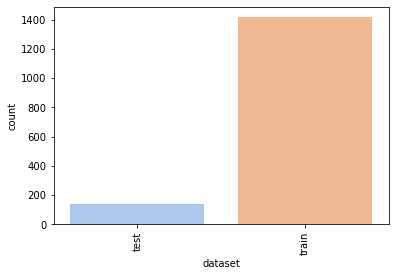

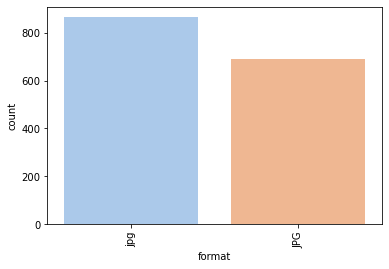

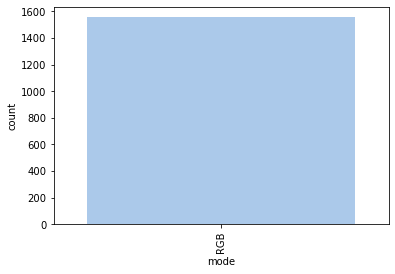

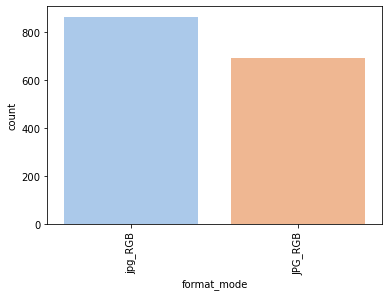

In [119]:
countplot_cat_features(df, [features_obj[0]] + features_obj[2:])

#### Check continuous features

In [120]:
images_profiles.describe().T

,count,mean,std,min,25%,50%,75%,max
num_obj_anno,1557.0,2.877328,4.001411,0.000,1.000000,2.000000,3.000000,84.000000
width,1557.0,2970.637765,920.761906,842.000,2448.000000,2624.000000,3264.000000,6000.000000
height,1557.0,3071.545922,675.728286,474.000,2448.000000,3264.000000,3264.000000,4618.000000
aspect_ratio,1557.0,1.023040,0.405320,0.456,0.750000,0.750000,1.333333,2.192982
aspect_ratio_max,1557.0,1.449233,0.271361,1.000,1.333333,1.333333,1.333333,2.192982


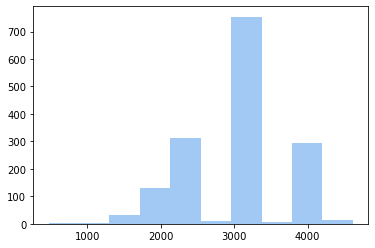

In [121]:
plt.hist(images_profiles['height'])
plt.show()

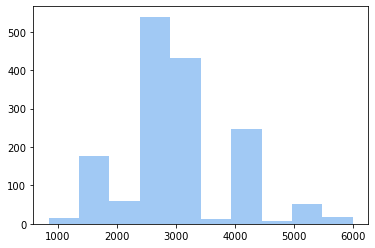

In [122]:
plt.hist(images_profiles['width'])
plt.show()

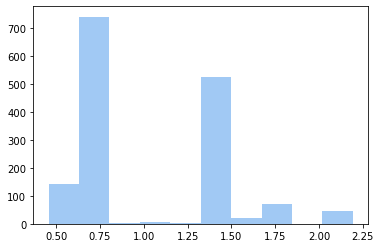

In [123]:
plt.hist(images_profiles['aspect_ratio'])
plt.show()

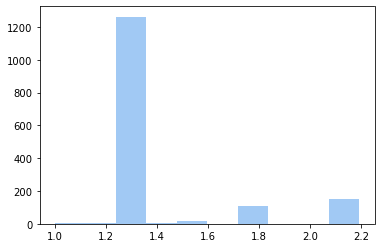

In [124]:
plt.hist(images_profiles['aspect_ratio_max'])
plt.show()

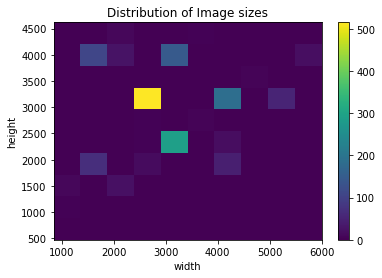

In [125]:
plt.hist2d(images_profiles['width'], images_profiles['height'])
plt.title('Distribution of Image sizes')
plt.xlabel('width')
plt.ylabel('height')
plt.colorbar()
plt.show()

### Check annotation of objects 

#### Check if all images are annotated

In [126]:
# Get list of images file name
img_train_list = os.listdir('data\\taco\\images\\train')
img_train_list = [img_name[:-4] for img_name in img_train_list]

In [127]:
img_test_list = os.listdir('data\\taco\\images\\test')
img_test_list = [img_name[:-4] for img_name in img_test_list]

In [128]:
# Get list of annotation file name
anno_train_list = os.listdir('data\\taco\\labels\\train')
anno_train_list = [img_name[:-4] for img_name in anno_train_list]

In [129]:
anno_test_list = os.listdir('data\\taco\\labels\\test')
anno_test_list = [img_name[:-4] for img_name in anno_test_list]

In [130]:
# Check the length of the lists
print(len(img_train_list))
print(len(img_test_list))
print(len(anno_train_list))
print(len(anno_test_list))

1415
142
1415
142


In [131]:
# Check for all images, if there is a corresponding annotation
print(img_train_list == anno_train_list)
print(img_test_list == anno_test_list)

True
True


#### Check for number of objects annotated in each image

In [132]:
# Get largest number of objects detected in images_profiles
images_profiles['num_obj_anno'].max()

84

In [133]:
# Get largest number of objects detected in images_profiles
images_profiles['num_obj_anno'].min()

0

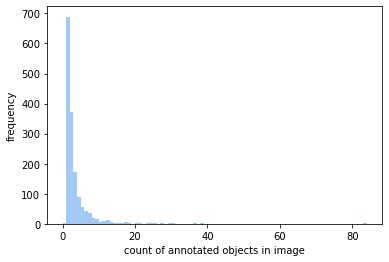

In [134]:
plt.hist(images_profiles['num_obj_anno'], [i for i in range(85)])
plt.xlabel('count of annotated objects in image')
plt.ylabel('frequency')
plt.show()

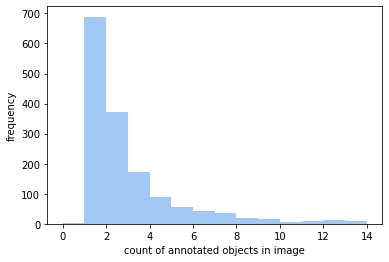

In [135]:
# zoomed in view
plt.hist(images_profiles['num_obj_anno'], [i for i in range(15)])
plt.xlabel('count of annotated objects in image')
plt.ylabel('frequency')
plt.show()

#### Check number of annotated objects in each class

In [136]:
# Initialise dictionary for count of objects annotated in each class
class_count = {}
for i in range(12):
    class_count[i] = 0

In [137]:
for dataset in os.listdir('data\\taco\\images'):
    for img_name in os.listdir('data\\taco\\images\\' + dataset):
        # Get number of objects annotated
        with open ('data\\taco\\labels\\' + dataset + '\\' + img_name[:-4] + '.txt', "r") as f:
            string = f.readlines()
            string_2 = [line[0:-1] for line in string]
            string_3 = [line.split(' ') for line in string_2]
            for object in string_3:
                class_count[int(object[0])] += 1

In [138]:
class_dict_

{0: 'Aluminium Foil',
 1: 'Bottle',
 2: 'Bottle Cap',
 3: 'Can',
 4: 'Carton',
 5: 'Cup',
 6: 'Food Waste',
 7: 'Other Plastic',
 8: 'Paper Trash',
 9: 'Plastic Trash',
 10: 'Unlabeled Litter',
 11: 'Cigarette'}

In [139]:
class_count

{0: 66,
 1: 477,
 2: 312,
 3: 308,
 4: 285,
 5: 209,
 6: 8,
 7: 305,
 8: 189,
 9: 1059,
 10: 560,
 11: 702}

In [140]:
for key, value in class_dict_.items():
    class_count[value] = class_count[key]
    del class_count[key]

In [141]:
class_count

{'Aluminium Foil': 66,
 'Bottle': 477,
 'Bottle Cap': 312,
 'Can': 308,
 'Carton': 285,
 'Cup': 209,
 'Food Waste': 8,
 'Other Plastic': 305,
 'Paper Trash': 189,
 'Plastic Trash': 1059,
 'Unlabeled Litter': 560,
 'Cigarette': 702}

In [142]:
labels_ = list(class_count.keys())
count_ = list(class_count.values())
labels_

['Aluminium Foil',
 'Bottle',
 'Bottle Cap',
 'Can',
 'Carton',
 'Cup',
 'Food Waste',
 'Other Plastic',
 'Paper Trash',
 'Plastic Trash',
 'Unlabeled Litter',
 'Cigarette']

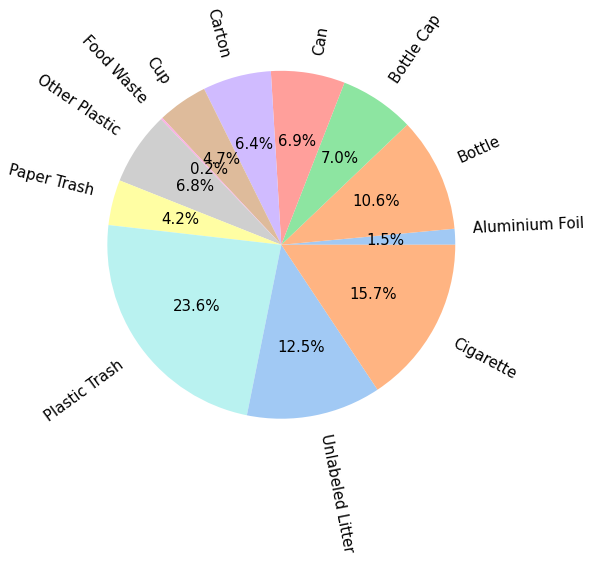

In [143]:
plt.figure(figsize=(8,8))
sns.set_palette("pastel", 30)
plt.pie(count_, labels = labels_, autopct = "%0.1f%%" ,textprops={"fontsize": 15}, rotatelabels=True)
plt.show()

In [144]:
count = 0
for _, value in class_count.items():
    count += value
count

4480

### Check validity of annotations

The bounding boxes convention: <br>

https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/

In [145]:
import os

root_dir = os.getcwd()
os.getcwd()

'c:\\Users\\Jansen-Lin\\aiap_gitlab\\mini_project\\jansen_lin\\team1'

In [146]:
import PIL

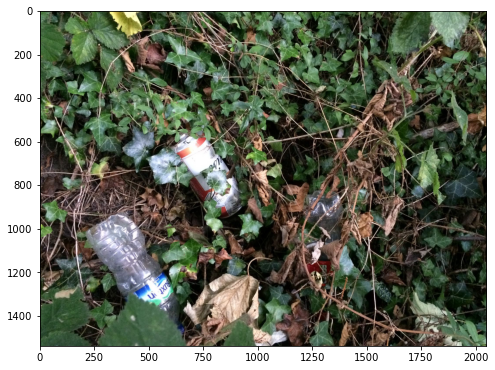

In [147]:
from PIL import Image
im = Image.open(root_dir + '\\data\\taco\\images\\train\\batch_1_000019.jpg')

plt.figure(figsize=(8,8))
plt.imshow(im)
plt.show()

In [148]:
f = open(root_dir + '\\data\\taco\\labels\\train\\batch_1_000019.txt', "r")
string = f.readlines()
string

['1 0.212787 0.781392 0.221571 0.365647\n',
 '1 0.635188 0.679896 0.08736 0.290176\n',
 '2 0.316496 0.950878 0.014153 0.025374\n',
 '3 0.370669 0.488289 0.166423 0.2635\n']

In [149]:
with open(root_dir + '\\data\\taco\\labels\\train\\batch_1_000019.txt', "r") as f:
    string = f.readlines()

In [150]:
# Remove the escape character for new line
string_2 = [line[0:-1] for line in string]
string_2

['1 0.212787 0.781392 0.221571 0.365647',
 '1 0.635188 0.679896 0.08736 0.290176',
 '2 0.316496 0.950878 0.014153 0.025374',
 '3 0.370669 0.488289 0.166423 0.2635']

In [151]:
string_3 = [line.split(' ') for line in string_2]
string_3

[['1', '0.212787', '0.781392', '0.221571', '0.365647'],
 ['1', '0.635188', '0.679896', '0.08736', '0.290176'],
 ['2', '0.316496', '0.950878', '0.014153', '0.025374'],
 ['3', '0.370669', '0.488289', '0.166423', '0.2635']]

In [152]:
np.float(string_3[0][2])

C:\Users\Jansen-Lin\AppData\Local\Temp\ipykernel_7632\3492736308.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.float(string_3[0][2])


0.781392

#### Display the image found to have no annotation in the annotation .txt file. 

In [153]:
# Choose image
img_name = "batch_10_000000"

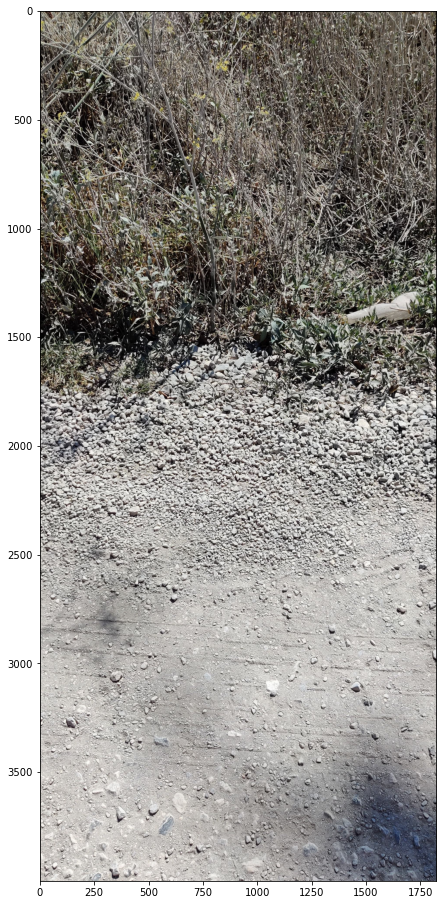

In [154]:
root_dir = os.getcwd()
im = Image.open(root_dir + '\\data\\taco\\images\\train\\' + f'{img_name}'+ '.jpg')


plt.figure(figsize=(16,16))
plt.imshow(im)
plt.show()

In [155]:
f = open(root_dir + '\\data\\taco\\labels\\train\\'+f'{img_name}'+'.txt', "r")
string = f.readlines()
string_2 = [line[0:-1] for line in string]
string_3 = [line.split(' ') for line in string_2]

In [156]:
width, height = im.size
print(width, height)

1824 4000


In [157]:
for box in string_3:
    label = box[0]
    x_center = np.float64(box[1]) * width
    y_center = np.float64(box[2]) * height
    width_n = np.float64(box[3]) * width
    height_n = np.float64(box[4]) * height
    left = x_center - width_n/2
    top = y_center - height_n/2
    right = x_center + width_n/2
    bottom = y_center + height_n/2

    slice = im.crop((left, top, right, bottom))
    plt.figure(figsize=(6,6))
    plt.title(f'Label: {class_dict_[int(label)]}')
    plt.imshow(slice)